In [3]:
#importing the necessary libraries
import re
import pandas as pd

In [4]:
#the chats extracted from whatsapp are in '.txt' format, we need to convert them to a dataframe.

#opening the '.txt' file in read mode
file = open("whatsapp-chat-1.txt", 'r', encoding='utf-8')

#reading all the data from file and storing it in a variable
data = file.read()

#printing the data
print(data)

04/12/22, 8:53 pm - Group creator created group "DJ🎧 NØKASHI⚠️ FANCLUB🚬"
04/12/22, 8:53 pm - You were added
23/12/22, 3:27 pm - SAMARTH PARASHAR - CSE MIT: Waiting for this message
23/12/22, 3:28 pm - ARYAN KALRA - ECE MIT: Waiting for this message
23/12/22, 3:31 pm - DHRUV BAJAJ - CSE MIT: Avg medium size mall phoenix kurla
23/12/22, 4:30 pm - ARYAN KALRA - ECE MIT: Waiting for this message
23/12/22, 6:32 pm - SHRUDEX: Waiting for this message
23/12/22, 6:44 pm - DHRUV BAJAJ - CSE MIT: I miss @919265585050
23/12/22, 6:55 pm - SHRUDEX: Waiting for this message
23/12/22, 8:29 pm - ARYAN KALRA - ECE MIT: Are ofc karte bro
23/12/22, 8:29 pm - ARYAN KALRA - ECE MIT: 🫂
23/12/22, 8:29 pm - ARYAN KALRA - ECE MIT: <Media omitted>
23/12/22, 8:30 pm - ARYAN KALRA - ECE MIT: Mumbai T2 OP
23/12/22, 8:30 pm - ARJUN NAIR - MECH MIT: Wow
23/12/22, 8:31 pm - DHRUV BAJAJ - CSE MIT: Pehli baar ameeri dekh rha hai?
23/12/22, 8:35 pm - ARYAN KALRA - ECE MIT: Haa bro 🥲
23/12/22, 9:07 pm - VAIBHAV SHARMA - 

In [5]:
#on seeing the data, 2 columns need to be created - Date&Time, Sender&Message

In [6]:
#creating a regex equation that matches the date and time format in the given message
pattern = '\d{2}\/\d{2}\/\d{2}, \d{1,2}:\d{2}\s(?:am|pm) - '

In [7]:
#extracting messages on the basis of 'regex' pattern
messages = re.split(pattern, data)[1:]

#printing the first 10 messages
messages[:10]

['Group creator created group "DJ🎧 NØKASHI⚠️ FANCLUB🚬"\n',
 'You were added\n',
 'SAMARTH PARASHAR - CSE MIT: Waiting for this message\n',
 'ARYAN KALRA - ECE MIT: Waiting for this message\n',
 'DHRUV BAJAJ - CSE MIT: Avg medium size mall phoenix kurla\n',
 'ARYAN KALRA - ECE MIT: Waiting for this message\n',
 'SHRUDEX: Waiting for this message\n',
 'DHRUV BAJAJ - CSE MIT: I miss @919265585050\n',
 'SHRUDEX: Waiting for this message\n',
 'ARYAN KALRA - ECE MIT: Are ofc karte bro\n']

In [8]:
#extracting date&time on the basis of 'regex' pattern
dates = re.findall(pattern, data)

#printing the first value
dates[0]

'04/12/22, 8:53\u202fpm - '

In [9]:
#replacing the \u202f character with a space in the dates list
dates = [date.replace('\u202f', ' ') for date in dates]

#printing the first 10 values
dates[:10]

['04/12/22, 8:53 pm - ',
 '04/12/22, 8:53 pm - ',
 '23/12/22, 3:27 pm - ',
 '23/12/22, 3:28 pm - ',
 '23/12/22, 3:31 pm - ',
 '23/12/22, 4:30 pm - ',
 '23/12/22, 6:32 pm - ',
 '23/12/22, 6:44 pm - ',
 '23/12/22, 6:55 pm - ',
 '23/12/22, 8:29 pm - ']

In [10]:
#converting to a pandas dataframe
x = pd.DataFrame({"messages":messages, "date":dates})

#converting the "date" type
x["date"] = pd.to_datetime(x['date'], format='%d/%m/%y, %I:%M %p - ')

#converting time to 24-hour format and updating the "dates" column
x["date"] = x["date"].dt.strftime('%Y-%m-%d %H:%M:%S')

#displaying the top 5 values of dataframe
x.head(5)

,messages,date
0,"Group creator created group ""DJ🎧 NØKASHI⚠️ FAN...",2022-12-04 20:53:00
1,You were added\n,2022-12-04 20:53:00
2,SAMARTH PARASHAR - CSE MIT: Waiting for this m...,2022-12-23 15:27:00
3,ARYAN KALRA - ECE MIT: Waiting for this message\n,2022-12-23 15:28:00
4,DHRUV BAJAJ - CSE MIT: Avg medium size mall ph...,2022-12-23 15:31:00


In [11]:
#now, the dataframe is created with message and date columns

In [12]:
#extracting the size of the dataframe created
x.shape

(2271, 2)

In [13]:
#i have to split the messages column to "user" and "messages"

In [14]:
#splitting the "messages" column into "user" and "message" columns
x[['user', 'message']] = x['messages'].str.split(': ', 1, expand=True)

#setting "default" user for messages without a sender
x.loc[x['messages'].str.find(':') == -1, 'user'] = "default"

#for the "default" case or messages without a colon, the "message" column will store the "messages"
x.loc[x['messages'].str.find(':') == -1, 'message'] = x['messages']

#for messages with a colon, split the message and store the user and message accordingly
x.loc[x['messages'].str.find(':') != -1, 'user'] = x['messages'].str.split(':').str[0]
x.loc[x['messages'].str.find(':') != -1, 'message'] = x['messages'].str.split(': ').str[1]

#dropping the "messages" column
x.drop('messages', axis=1, inplace=True)

#reordering the columns
x = x[['date', 'user', 'message']]

#displaying the updated dataframe
x.head()

,date,user,message
0,2022-12-04 20:53:00,default,"Group creator created group ""DJ🎧 NØKASHI⚠️ FAN..."
1,2022-12-04 20:53:00,default,You were added\n
2,2022-12-23 15:27:00,SAMARTH PARASHAR - CSE MIT,Waiting for this message\n
3,2022-12-23 15:28:00,ARYAN KALRA - ECE MIT,Waiting for this message\n
4,2022-12-23 15:31:00,DHRUV BAJAJ - CSE MIT,Avg medium size mall phoenix kurla\n


In [15]:
#extracting year, month and day from "date" column and creating new columns
x["year"] = pd.to_datetime(x["date"], format="%Y-%m-%d %H:%M:%S").dt.year
x["month"] = pd.to_datetime(x["date"], format="%Y-%m-%d %H:%M:%S").dt.month_name()
x["day"] = pd.to_datetime(x["date"], format="%Y-%m-%d %H:%M:%S").dt.day

#extracting hour and minute from "date" column and creating new columns
x['hour'] = x["year"] = pd.to_datetime(x["date"], format="%Y-%m-%d %H:%M:%S").dt.hour
x['minute'] = x["year"] = pd.to_datetime(x["date"], format="%Y-%m-%d %H:%M:%S").dt.minute

x

,date,user,message,year,month,day,hour,minute
0,2022-12-04 20:53:00,default,"Group creator created group ""DJ🎧 NØKASHI⚠️ FAN...",53,December,4,20,53
1,2022-12-04 20:53:00,default,You were added\n,53,December,4,20,53
2,2022-12-23 15:27:00,SAMARTH PARASHAR - CSE MIT,Waiting for this message\n,27,December,23,15,27
3,2022-12-23 15:28:00,ARYAN KALRA - ECE MIT,Waiting for this message\n,28,December,23,15,28
4,2022-12-23 15:31:00,DHRUV BAJAJ - CSE MIT,Avg medium size mall phoenix kurla\n,31,December,23,15,31
...,...,...,...,...,...,...,...,...
2266,2023-04-20 16:07:00,ANAY PATIL - CSE MIT,Does anyone have hdmi to hdmi cable ?\n,7,April,20,16,7
2267,2023-04-20 18:58:00,VAIBHAV SHARMA - CIVIL MIT,POLL:\nAnybody in for gokarna/chikmaglur/Ooty/...,58,April,20,18,58
2268,2023-04-20 19:33:00,ARJUN NAIR - MECH MIT,There is no option for fuck off or else i woul...,33,April,20,19,33
2269,2023-04-20 19:36:00,VAIBHAV SHARMA - CIVIL MIT,There is IPC 402 otherwise i would have come t...,36,April,20,19,36


In [21]:
#calculating the descriptive stats

totalMessages = x[x['user']=='Shubh Sinha.👨🏻‍💻'].shape[0]

dataFrame = x[x['user'] == "Shubh Sinha.👨🏻‍💻"]
word=[]
for message in dataFrame['message']:
    word.extend(message.split())
totalWords = len(word)

totalMedia = x[x['message'] == '<Media omitted>\n'].shape[0]

from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls(" ".join(word))
totalURL = len(urls)

print("Total Messages by Shubh Sinha:", totalMessages)
print("Total Words :", totalWords)
print("Total Media :", totalMedia)
print("Total URLs :", totalURL)

Total Messages by Shubh Sinha: 591
Total Words : 2456
Total Media : 311
Total URLs : 5


In [29]:
topChatter = x['user'].value_counts().head()

C:\Users\codes\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128104 (\N{MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\codes\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\codes\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


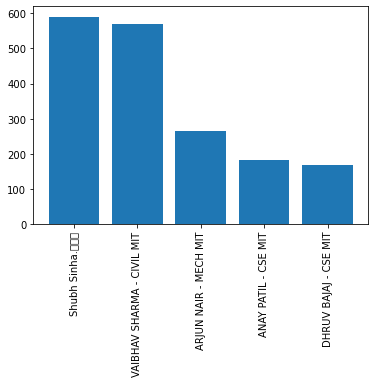

In [31]:
import matplotlib.pyplot as plt
import numpy as np
name = topChatter.index
count = topChatter.values
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
topChatterPercent = round((x['user'].value_counts()/x.shape[0])*100, 2).reset_index().rename(columns={'index':"name", 'user':'percentage'})
topChatterPercent

,name,percentage
0,Shubh Sinha.👨🏻‍💻,26.02
1,VAIBHAV SHARMA - CIVIL MIT,25.14
2,ARJUN NAIR - MECH MIT,11.62
3,ANAY PATIL - CSE MIT,8.06
4,DHRUV BAJAJ - CSE MIT,7.35
5,DEEPESH ADWANI - DSE MIT,5.15
6,+91 90362 68271,3.39
7,ARYAN KALRA - ECE MIT,2.86
8,SOUMYADEEP DAS - MECH MIT,2.60
9,SAMARTH PARASHAR - CSE MIT,2.11


In [60]:
#remove stopwords and group notifications
withoutGN = x[x['user'] != 'default']
withoutGNMedia = withoutGN[withoutGN["message"] != '<Media omitted>\n']

stopWords = open("stopwords-hinglish.txt", "r").read()
print(stopWords)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [61]:
withoutGNMedia

,date,user,message,year,month,day,hour,minute
2,2022-12-23 15:27:00,SAMARTH PARASHAR - CSE MIT,Waiting for this message\n,27,December,23,15,27
3,2022-12-23 15:28:00,ARYAN KALRA - ECE MIT,Waiting for this message\n,28,December,23,15,28
4,2022-12-23 15:31:00,DHRUV BAJAJ - CSE MIT,Avg medium size mall phoenix kurla\n,31,December,23,15,31
5,2022-12-23 16:30:00,ARYAN KALRA - ECE MIT,Waiting for this message\n,30,December,23,16,30
6,2022-12-23 18:32:00,SHRUDEX,Waiting for this message\n,32,December,23,18,32
...,...,...,...,...,...,...,...,...
2266,2023-04-20 16:07:00,ANAY PATIL - CSE MIT,Does anyone have hdmi to hdmi cable ?\n,7,April,20,16,7
2267,2023-04-20 18:58:00,VAIBHAV SHARMA - CIVIL MIT,POLL:\nAnybody in for gokarna/chikmaglur/Ooty/...,58,April,20,18,58
2268,2023-04-20 19:33:00,ARJUN NAIR - MECH MIT,There is no option for fuck off or else i woul...,33,April,20,19,33
2269,2023-04-20 19:36:00,VAIBHAV SHARMA - CIVIL MIT,There is IPC 402 otherwise i would have come t...,36,April,20,19,36


In [70]:
words = []

for message in withoutGNMedia['message']:
    for word in message.lower().split():
        if word not in stopWords:
            words.append(word)

In [71]:
from collections import Counter
mC = Counter(words).most_common(50)
mostCommon = pd.DataFrame(mC)
mostCommon

,0,1
0,कॉमेडी,68
1,का,68
2,राजा,68
3,आया🏃🏃🏃भागो,64
4,bruh,33
5,wow,27
6,@917506417603,26
7,😘,23
8,happy,22
9,@919064642847,21


In [78]:
!pip install emoji

In [86]:
import emoji

In [85]:
emojis = []
for message in x['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
emojiDF = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
emojiDF

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'